# Aula 03 - NumPy (Parte II)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/2560px-NumPy_logo_2020.svg.png" alt="Alternative text" />

[Guia rápido de uso da biblioteca](https://numpy.org/devdocs/user/quickstart.html)

[Guia para iniciantes](https://numpy.org/devdocs/user/absolute_beginners.html)

Na aula passada, vimos que:

- um **array** é o elemento básico por meio do qual a biblioteca *numpy* opera;
- este elemento **difere de uma lista**, por ser homogêneo e possibilitar cálculos de uma maneira altamente eficiente;
- a **indexação** de arrays é muito similar àquela de listas;
- a biblioteca *numpy* fornece ferramentas para gerar arrays baseados em distribuições estatísticas (como uniforme e normal) de maneira aleatória;
- existem diversos métodos que sumarizam alguamas propriedades dos vetores, como *.mean()*, *.std()*, entre outros.

Na aula de hoje, vamos explorar os conceitos de **filtros** e de **matrizes** com numpy.

___

#### Filtros (máscaras)

Uma das funções mais importantes do numpy é a possibilidade de construção de **filtros**, que também são chamados de **máscaras**

O objetivo dos filtros é **selecionar apenas os elementos de um array que satisfaçam determinada condição**

In [2]:
# definindo um array aleatório com np.random.rand(10)
# seed 42
import numpy as np
np.random.seed(42)

arr = np.random.rand(20)

arr

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914])

Ao usar um **operador lógico** juntamente com um array, o numpy **aplica a operação lógica a cada um dos elementos do array**, retornando um **array de bools** com o resultado de cada uma das operações lógicas:

In [3]:
arr

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914])

In [4]:
# pergunta: quais os elementos são menores que 0.5?

arr < 0.5

array([ True, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True])

In [5]:
# QUANTOS elementos satisfazem a condição?
# quantos elementos são menores que 0.5

(arr < 0.5).sum()

11

Uma vez criado o filtro, é possível **utilizá-lo como indexador do array**, para selecionar **apenas os elementos com indice correspondente a True no filtro**

In [6]:
arr

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914])

In [8]:
# quero elementos do "arr" tais que os elementos do array são menos que 0.5

arr[arr < 0.5]

array([0.37454012, 0.15601864, 0.15599452, 0.05808361, 0.02058449,
       0.21233911, 0.18182497, 0.18340451, 0.30424224, 0.43194502,
       0.29122914])

In [9]:
# a operação abaixo FILTRA apenas os números do array "aleat" que sejam MAIORES do que 0.5

arr[arr > 0.5]

array([0.95071431, 0.73199394, 0.59865848, 0.86617615, 0.60111501,
       0.70807258, 0.96990985, 0.83244264, 0.52475643])

In [10]:
# a operação abaixo FILTRA apenas os números do array "aleat" que sejam IGUAIS a 0.5

arr[arr == 0.5]

array([], dtype=float64)

Mais um exemplo...

In [11]:
# definindo um array aleatório com np.random.randint(0, 100, 20)
# seed 42

np.random.seed(42)

ints = np.random.randint(0, 100, 20)

ints

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37])

In [12]:
# filtrando apenas os pares

ints[ints % 2 == 0]

array([92, 14, 60, 20, 82, 86, 74, 74,  2, 52])

In [24]:
# filtrando apenas os ímpares

ints[ints % 2 != 0]

array([51, 71, 87, 99, 23, 21,  1, 87, 29, 37])

In [25]:
ints[~(ints % 2 == 0)]

array([51, 71, 87, 99, 23, 21,  1, 87, 29, 37])

[np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [22]:
np.where(ints % 2 == 0, ints, np.nan)

array([nan, 92., 14., nan, 60., 20., 82., 86., 74., 74., nan, nan, nan,
        2., nan, 52., nan, nan, nan, nan])

Também é possível aplicar **filtros compostos**!

Pra fazer isso, nós fazems uma **composição lógica** entre os filtros (análogo ao "and" e ao "or")

No caso de arrays, usamos:

- "&" para "and"
- "|" para "or"
- "~" para "not"

In [26]:
# condição correspondente a números pares E maiores que 50

(ints % 2 == 0) & (ints > 50)

array([False,  True, False, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False])

In [27]:
# filtrando numeros pares E maiores que 50

ints[(ints % 2 == 0) & (ints > 50)]

array([92, 60, 82, 86, 74, 74, 52])

In [28]:
# numeros que são pares OU maiores que 50

ints[(ints % 2 == 0) | (ints > 50)]

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99,  2, 52, 87])

In [29]:
# filtrando numeros impares E maiores que 50

ints[~(ints % 2 == 0) & (ints > 50)]

array([51, 71, 87, 99, 87])

___

### Matrizes

Costumamos nos referir às **matrizes** como arrays multidimensionais (i.e., mais de uma dimensão).

<img src = "https://numpy.org/devdocs/_images/np_create_matrix.png" />

In [31]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

[numpy.shape](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)

In [32]:
# atributo .shape, que mostra qual é a dimensão do array
# notação: (numero_de_linhas, numero_de_colunas)

data.shape

(3, 2)

#### Indexação de matrizes

A idexação com matrizes segue a mesma lógica dos arrays. Há algumas formas de indexar o mesmo elemento, conforme ilustrado abaixo.

Suponhamos que queiramos o elemento da segunda linha da matriz, e da segunda coluna.

In [39]:
# lembrando que a indexação em Python começa em 0
data[1,1]

4

Alternativamente, podemos indexar o mesmo elemento escrevendo:

In [40]:
data[1][1]

4

<img src = "https://numpy.org/devdocs/_images/np_matrix_indexing.png" />

#### Agregações

Similarmente a como fizemos com **arrays**, também podemos aplicar **funções de agregação** às matrizes:

In [34]:
data.max()

6

In [35]:
data.min()

1

In [36]:
data.sum()

21

<img src = "https://numpy.org/devdocs/_images/np_matrix_aggregation.png" />

Também podemos ter situações em que gostaríamos de **agregar por linhas e/ou colunas**, o que também é possível, especificando o parâmetro *axis*, conforme abaixo.

In [37]:
# "axis = 0" opera na direção das colunas, retornando um vetor-linha
data.max(axis = 0)

array([5, 6])

In [38]:
# "axis = 1" opera na direção das linhas, retornando um vetor-coluna
data.max(axis = 1)

array([2, 4, 6])

<img src = "https://numpy.org/devdocs/_images/np_matrix_aggregation_row.png" />

[numpy.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

Em algumas situações, pode ser útil **reformatar** nosso conjunto de dados. Para isso, utilizamos a função *.reshape()*.

In [42]:
# Vamos supor um vetor originalmente de 10 elementos
dados_originais = np.arange(0,10)
dados_originais

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
# Vamos transformá-lo em uma matriz de duas linhas e cinco colunas
dados_reformatados = np.reshape(dados_originais, [2,5])
dados_reformatados

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [53]:
dados_reformatados.shape

(2, 5)

In [50]:
# Alternativamente, também poderíamos ter optado por cinco linhas e duas colunas
dados_reformatados = np.reshape(dados_originais, [5, 2])
dados_reformatados

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [51]:
dados_reformatados.shape

(5, 2)

**Atenção:** ao utilizar o reshape, o número de elementos total nunca pode ser alterado!

In [54]:
np.reshape(dados_originais, [3,3])

ValueError: cannot reshape array of size 10 into shape (3,3)

<img src = "https://numpy.org/devdocs/_images/np_reshape.png" />

#### Operações com matrizes

In [57]:
matriz1 = np.array([[1, 2], [3, 4]])
matriz2 = np.array([[5, 4], [-2, 0]])
matriz1 + matriz2

array([[6, 6],
       [1, 4]])

<img src="https://numpy.org/devdocs/_images/np_matrix_arithmetic.png" />

Diferentemente com arrays unidimensionais, conseguimos operar com matriz de tamanhos diferentes, **desde que sejam essencialmente um vetor-linha ou um vetor-coluna**.

In [58]:
array = [1,1]
matriz1 + array

array([[2, 3],
       [4, 5]])

<img src = "https://numpy.org/devdocs/_images/np_matrix_broadcasting.png" />

In [62]:
matriz1 * matriz2

array([[ 5,  8],
       [-6,  0]])

#### Transpondo arrays

Transpor a matriz equivale a "trocar" as linhas pelas colunas.

In [60]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [61]:
data.transpose()

array([[1, 3, 5],
       [2, 4, 6]])

<img src = "https://numpy.org/devdocs/_images/np_transposing_reshaping.png" />

#### Filtrando matrizes 

Seguimos a mesma lógica de filtros em arrays unidimensionais, com a particularidade de que estamos lidando, agora, com mais de uma dimensão - e podemos levar isso em consideração.

In [67]:
# filtrando a matriz como um todo
data > 2

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [66]:
# Filtrando o primeiro elemento de cada coluna da matriz
data[0,:] > 1

array([False,  True])

In [68]:
# Filtrando o segundo elemento de cada linha da matriz
data[:,1] > 4

array([False, False,  True])

Assim como fizemos anteriromente, podemos utilizar esse array booleano para indexar a matriz original.

In [69]:
data

array([[1, 2],
       [3, 4],
       [5, 6]])

In [70]:
data[data[:,1] > 4, :]

array([[5, 6]])

Um outro exemplo

In [73]:
# Vamos gerar uma matriz 4x4 aleatoriamente
d=np.random.randn(4,4)
d

array([[ 0.17269371,  0.32419877,  0.74585954, -1.83658324],
       [ 0.56446424,  0.02550067,  0.47319325,  0.6591906 ],
       [ 2.34074633,  1.07098519,  0.09641648,  0.41910211],
       [-0.95302779, -1.0478706 , -1.87567677, -1.36678214]])

In [78]:
# Filtremos todas as linhas cuja segunda coluna seja positiva
d[:,1] > 0

array([ True,  True,  True, False])

In [79]:
# Agora, indexemos a matriz
d[d[:,1] > 0, :]

array([[ 0.17269371,  0.32419877,  0.74585954, -1.83658324],
       [ 0.56446424,  0.02550067,  0.47319325,  0.6591906 ],
       [ 2.34074633,  1.07098519,  0.09641648,  0.41910211]])

__________
___________

## Vamos praticar?

Em grupos, resolvam os exercícios a seguir.

**1.** Em uma **análise de regressão**, usualmente estamos interessados em descrever o comportamento em um conjunto de dados por meio de uma **função** que descreva, o tanto quanto possível, nosson conjunto de dados.

Por exemplo, no gráfico abaixo, os pontos vermelhos relacionam as medidas das duas variáveis sendo avaliadas (nos eixos x e y); e a linha azul aproxima a relação entre elas por uma função linear.

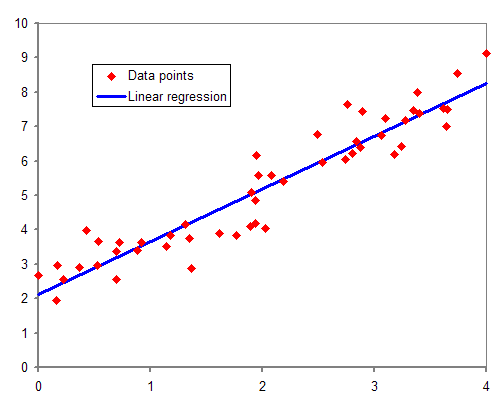

É possível ver que nem todos os pontos obedecem exatamente à relação ditada pela reta (isto é, há pontos que não estão exatamente "sobre a reta"; mas, sim, ligeraimente acima, ou abaixo, dela). Isto, contudo, é esperado em um modelo de regressão, por inúmeras fontes de incerteza associadas às medições.

Uma das métricas que utilizamos para avaliar a qualidade de uma regressão é o **erro quadrático médio (EQM)**, que mensura a diferença total entre cada predição da regressão ($y_{prediction}$) com o valor real de cada i-ésima medida ($y_{i}$). O EQM pode ser definido como:

$EQM = \frac{1}{n}\sum_{i=1}^{n}(y_{prediction} - y_{i})^2$.

Isto posto, escreva uma função que calcule o EQM recebendo, como entrada, os vetores $y_{prediction}$ e $y_{i}$. Por exemplo, digamos que sua função se chame *calculate_eqm*, ela deve operar da seguinte forma:

In [5]:
# dados dois arrays quaisquer de mesmo tamanho, a função deve retornar o EQM
y_prediction = np.array([1,2,3])
y_i = np.array([0,0,3])
calculate_eqm(y_prediction,y_i)

1.6666666666666665

In [3]:
import numpy as np

def calculate_eqm(y_predction, y_i):
    quadrado_das_substracoes = np.square(y_prediction-y_i)
    soma_dos_quadrados = np.sum(quadrado_das_substracoes)
    tamanho_da_array = np.size(y_predction)
    media = soma_dos_quadrados / tamanho_da_array
    return media

y_prediction = np.array([1,2,3])
y_i = np.array([0,0,3])
calculate_eqm(y_prediction, y_i)

1.6666666666666667

In [4]:
def calculate_eqm(y_prediction,y_i):
    n = y_i.size
    return (1/n)*np.sum(np.square(y_prediction - y_i))

**2.** A eletroencefalografia (EEG) é uma técnica que mensura potenciais elétricos cerebrais em diversas regiões do escalpo do paciente. Suponha que você recebeu um conjunto de dados na forma de uma matriz de 64 x 512 elementos, em que cada linha contém o sinal gravado em um dos **eletrodos** espalhados pelo escalpo em um exame de EEG, e cada coluna contém um valor de potencial elétrico, em microvolts. 

Como o sinal de EEG é muito suscetível a ruídos externos (interferências na qualidade do sinal), uma operação comum para atenuar a interferência no sinal consiste em tirar a média do potencial elétrico de todos os eletrodos, e subtrair este valor de cada um deles. Isto atenua fontes de ruído ao sinal comuns a todos os eletrodos. Em termos matemáticos, o sinal processado por esta operação, $X_{e,i}$ para cada eletrodo (e) e amostra (i), é dado por:

$X_{e,i} = \hat{X_{e,i}} - \frac{1}{N}\sum_{e=1}^{N}\hat{X_{e,i}}$,

em que $\hat{X_{e,i}}$ representa o sinal original (ou seja, é a matriz de entrada de 64 x 512 elementos), e $N$ indica o total de eletrodos.

Com o exposto acima, escreva uma função que retorne uma matriz com os sinais de EEG processados conforme a operação mencionada. Sua função deve operar conforme o exemplo abaixo.

In [7]:
import numpy as np

x = np.random.randn(64, 512)

def process_EEG_signal(matriz):
    media = np.mean(matriz)
    matriz_processada = matriz - media 
    return np.array(matriz_processada)

print(process_EEG_signal(x))


[[-0.15523729  0.29672859  0.95712369 ... -1.43478362 -0.34698192
   0.01380782]
 [-0.5094996   0.0412844   0.21329855 ... -0.49880636  0.31196918
  -0.94193659]
 [ 0.54020035  1.14701634 -0.18327735 ...  0.27132868 -0.09670654
  -1.50319992]
 ...
 [-0.0665961  -0.44530994 -1.89582632 ... -0.47711914 -1.81100292
   0.5854061 ]
 [-0.25779392 -0.43485462 -0.25953569 ... -0.19527493  1.01927712
  -0.41721326]
 [-0.49382146  0.38020951  0.77897274 ...  0.49784234 -0.16647212
   0.66948972]]


In [89]:
# vamos supor uma matriz de entrada gerada por dados aleatórios
X = np.random.randn(64,512)
X.shape # apenas para verificar as dimensões

(64, 512)

In [92]:
# a função deve retornar executar a operação equacionada anteriormente, retornando uma nova matriz
X_processado = process_EEG_signal(X)
X_processado.shape

(64, 512)

In [93]:
# Para indicar que as matrizes não são iguais
(X_processado - X).sum()

-53.08727366483029

In [94]:
X

array([[ 0.29305925,  0.89663038, -0.61032202, ..., -0.88086364,
        -0.8818789 ,  0.51260497],
       [-0.01274415,  1.05439522,  0.47958092, ..., -2.15387924,
         0.70721168,  0.97029889],
       [ 1.09478371, -0.16120847,  1.58400361, ...,  0.20981813,
         2.17373837,  0.94032162],
       ...,
       [-0.45294842, -2.28939505,  1.10111998, ...,  1.63581703,
        -0.39394924, -1.13400723],
       [-0.22669886,  0.25413429, -1.17870637, ..., -0.09509442,
         0.90733806,  0.37999411],
       [ 0.15476933, -0.03654717, -1.09982762, ...,  0.67600047,
        -0.84533328, -0.56433144]])

In [95]:
X_processado

array([[ 0.36713022,  0.85772513, -0.54902169, ..., -0.85626087,
        -0.97611435,  0.51718998],
       [ 0.06132682,  1.01548997,  0.54088126, ..., -2.12927647,
         0.61297623,  0.97488389],
       [ 1.16885469, -0.20011372,  1.64530394, ...,  0.23442091,
         2.07950292,  0.94490663],
       ...,
       [-0.37887744, -2.3283003 ,  1.16242031, ...,  1.6604198 ,
        -0.4881847 , -1.12942223],
       [-0.15262788,  0.21522904, -1.11740604, ..., -0.07049164,
         0.81310261,  0.38457911],
       [ 0.22884031, -0.07545242, -1.03852729, ...,  0.70060324,
        -0.93956874, -0.55974643]])

In [90]:
def process_EEG_signal(X):
    return X - X.mean(axis = 0)

**3.** Em estatística, um **outlier** é um valor que destoa consideravelmente da distribuição à qual está associado. Um dos critérios para idenficar outliers consiste em encontrar a **distância interquantil** (IQR), ou seja, a diferença entre o terceiro e o primeiro quantil da distribuição, e tomar como outliers todos os pontos abaixo, ou acima, de 1.5*IQR.

<img src = "https://blog.curso-r.com/images/posts/banner/outlier.webp" />

Escreva uma função que, dada uma matriz de dados de entrada de dimensões $N_{observações} \times N_{features}$ retorne três requisitos: 
- uma matriz booleana indicando a existência de outliers nos dados de entrada;
- a quantidade de outliers
- quem são os outliers (os valores).

**Algumas definições:**
- um *quantil* divide a distribuição, após ordenados os pontos, segundo algum ponto de corte;
- o **primeiro quantil** é o ponto para o qual 25 % dos valores da distribuição estão abaixo dele;
- o **terceiro quantil** é o ponto para o qual 75 % dos valores da distribuição estão abaixo dele.

Pode ser útil consultar a função **numpy.quantile**.

Exemplo de operação da função:

In [158]:
# Geremos um conjunto de dados qualquer
X = np.random.randn(300,15)
X

array([[-2.02108952,  0.57945921, -2.23074965, ..., -0.60349514,
         0.92180452, -0.15625722],
       [ 0.24904397,  0.03493447,  0.3515052 , ..., -0.46950081,
         0.20361331,  0.02715956],
       [ 0.55902525, -0.48435434,  0.90413414, ..., -0.54425743,
        -0.80769134, -0.07912549],
       ...,
       [-1.04069388, -0.24245725, -2.00308877, ...,  0.4084777 ,
        -1.81516131,  0.39063118],
       [-1.39275097,  0.3989636 ,  0.2926223 , ...,  1.2620666 ,
         0.72262949,  1.50737559],
       [ 0.15922011, -0.79810788, -1.60939896, ..., -0.08214499,
        -0.13167475,  0.15990558]])

In [167]:
# identificamos os requisitos com nossa com nossa função
is_outlier, outliers_count, outliers = locate_outliers(X)

In [168]:
is_outlier

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [165]:
outliers_count

44

In [166]:
outliers

array([-2.67240384,  3.00270904,  3.62317101,  3.18867865,  2.55581522,
       -2.82091429,  2.8757892 ,  2.70666036,  3.19514999, -3.40550318,
       -3.39825827,  2.6727295 ,  2.54498296, -2.69447104,  3.19521603,
        2.66372172, -2.77444948,  2.77421152,  2.69992869, -2.84831109,
       -2.83695779, -2.45908227,  3.07802106,  2.89314015, -2.68574682,
       -2.85019494,  2.43399574,  2.44291266, -2.92595937, -2.95911074,
       -3.03966003,  2.77543068, -2.67368414, -2.79965402, -3.0501958 ,
       -2.5437387 ,  3.08550649, -3.17666255, -3.05795476, -3.09826467,
        3.1399469 ,  3.18141942,  2.90564257, -2.89505054])

In [161]:
def locate_outliers(X):
    q1 = np.quantile(X, 0.25, axis=0)
    q3 = np.quantile(X, 0.75, axis=0)
    iqr = q3 - q1
    
    outliers_location = (X > q3 + 1.5*iqr) | (X < q1 - 1.5*iqr)
    outliers = X[outliers_location]
    outliers_count = outliers.size
    
    return outliers_location, outliers_count, outliers

In [15]:
import numpy as np
def outliers(matriz):
    q3 = np.quantile(matriz, .75)
    q1 = np.quantile(matriz, .25)
    
    iqr = q3 - q1
    limite_acima = 1.5 * iqr + q3
    limite_abaixo = 1.5 * iqr - q1
    outlier_bool = np.array(matriz > limite_acima)|(matriz < limite_abaixo)
    outlier_count = np.sum(outlier_bool)
    
    return f'Limit Above {limite_acima}\nLimit Below: {limite_abaixo}\nIs Outlier Bool: {outlier_bool}\nOutlier Count: {outlier_count}\nOutlier: Não consegui'

x = 5,10, 15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
print(f'values:{x}')
print(outliers(x))

values:(5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100)
Limit Above 147.5
Limit Below: 42.5
Is Outlier Bool: [ True  True  True  True  True  True  True  True False False False False
 False False False False False False False False]
Outlier Count: 8
Outlier: Não consegui
